Utworzyć wykres kołowy prezentujący procentowe występowanie targetów w różnych częściach komórki.

In [42]:
import pandas as pd
import lxml
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

In [43]:
path = 'data/drugbank_partial.xml'
ns = {'db': 'http://www.drugbank.ca'}

In [44]:
tree = ET.parse(path)
root = tree.getroot()

In [45]:
def unwrap(field, node: ET.Element):
    return getattr(node.find(f"db:{field}", ns), "text", None)

In [46]:
def unwrap_attrib(attrib, node: ET.Element):
    return node.attrib.get(attrib)

In [47]:
def targets_pie(drug_id):
    drug = root.find(f"db:drug[db:drugbank-id='{drug_id}']", ns)
    counts = {}
    for polypeptide in drug.findall('db:targets/db:target/db:polypeptide', ns):
        cellular_loc = unwrap("cellular-location", polypeptide)
        counts.setdefault(cellular_loc, 0)
        counts[cellular_loc] += 1

    # Drawing pie chart
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.2f%%')
    plt.title(f"Cellular Location Distribution ({unwrap('name', drug)})")
    plt.show()

In [67]:
def targets_pie_all():
    counts = {}
    for polypeptide in root.findall(f"db:drug/db:targets/db:target/db:polypeptide", ns):
        cellular_loc = unwrap("cellular-location", polypeptide)
        counts.setdefault(cellular_loc, 0)
        counts[cellular_loc] += 1

    # Drawing pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.2f%%')
    plt.title("Cellular Location Distribution (All)")
    plt.show()

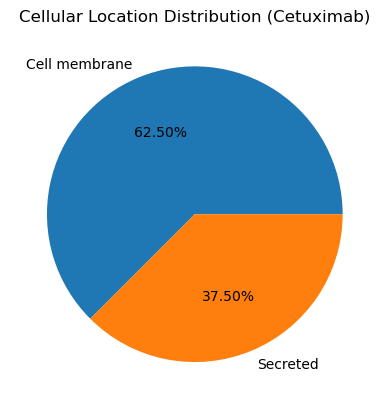

In [68]:
targets_pie("DB00002")

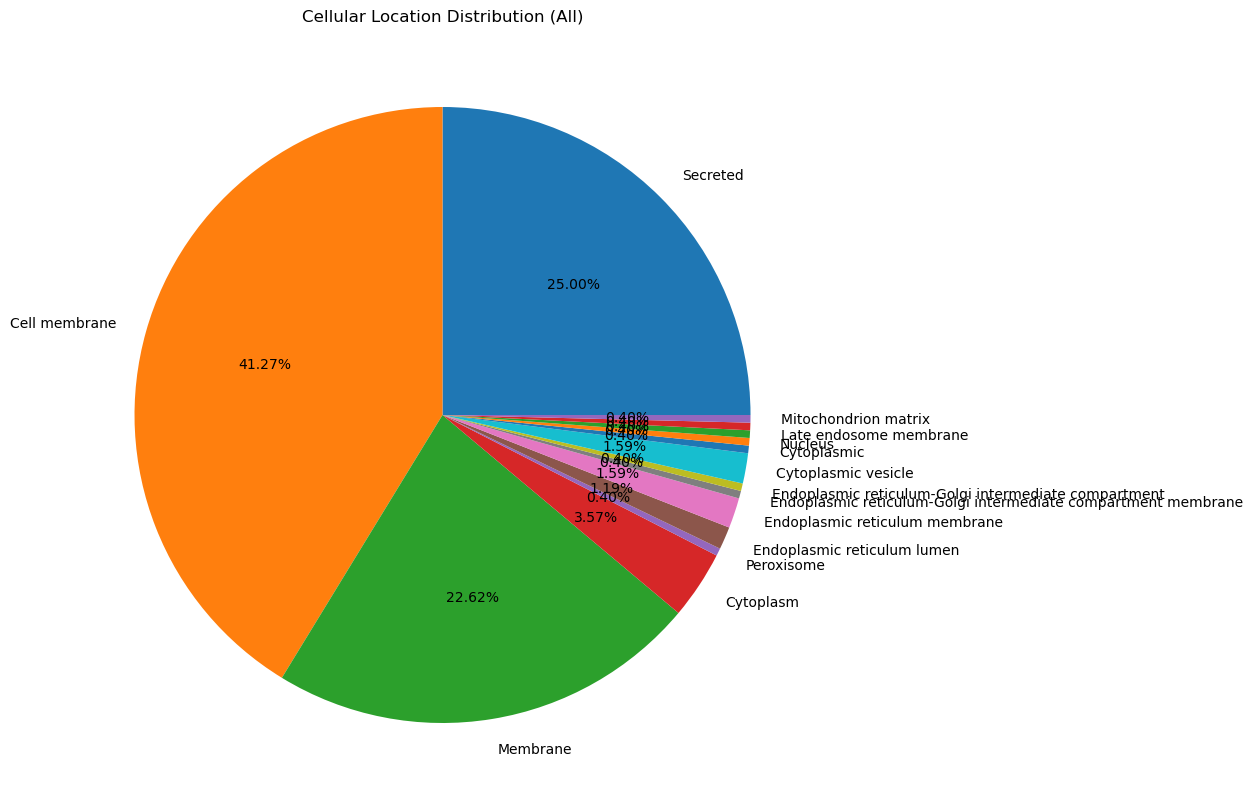

In [69]:
targets_pie_all()